# Introduction

The objective is to build a Multi Layer Perceptron(MLP) model for classification to predict the students academic success and dropout.Prediction of student performances/outcomes can be used to improve students progression and also to increase the retention rate.  The attributes are exhaustive, it includes demographic data, socio economic data, macroeconomic data and academic data.Given different attribute types, necessary preprocessing and appropriate neural network architecture will be built and results will be analysed.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
print("TF version:", tf.__version__)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


TF version: 2.18.0


In [ ]:
# Load the dataset
df = pd.read_csv("data.csv",delimiter=';')
# Display the data
display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


#Data description
The daset consists of 4424 observations and 36 variables. Each observation refers to an individual student. The data description paper has classified variables as numeric (discrete, binary and continuous) I have considered the discrete variables (eg., 'Course', 'Nationality') which represent categories as categorical, i have also included the variables with binary values (yes/no) as categorical for visualisation. Others which are discrete and represent counts (eg., 'Curricular units enrolled', 'Age at enrollment') are considered as numeric variables.The following table provides description of the above mentioned attributes,


| **Category of features**                        | **Features**                                 | **Type of data**                  |
|----------------------------------------------|----------------------------------------------|---------------------------|
| **Demographic data**                         | Marital status                               | Numeric/discrete         |
|                                              | Nationality                                  | Numeric/discrete         |
|                                              | Displaced                                    | Numeric/binary           |
|                                              | Gender                                       | Numeric/binary           |
|                                              | Age at enrollment                           | Numeric/discrete         |
|                                              | International                               | Numeric/binary           |
| **Socioeconomic data**                       | Mother’s qualification                      | Numeric/discrete         |
|                                              | Father’s qualification                      | Numeric/discrete         |
|                                              | Mother’s occupation                         | Numeric/discrete         |
|                                              | Father’s occupation                         | Numeric/discrete         |
|                                              | Educational special needs                   | Numeric/binary           |
|                                              | Debtor                                      | Numeric/binary           |
|                                              | Tuition fees up to date                     | Numeric/binary           |
|                                              | Scholarship holder                          | Numeric/binary           |
| **Macroeconomic data**                       | Unemployment rate                           | Numeric/continuous       |
|                                              | Inflation rate                              | Numeric/continuous       |
|                                              | GDP                                         | Numeric/continuous       |
| **Academic data at enrollment**              | Application mode                            | Numeric/discrete         |
|                                              | Application order                           | Numeric/ordinal          |
|                                              | Course                                      | Numeric/discrete         |
|                                              | Daytime/evening attendance                 | Numeric/binary           |
|                                              | Previous qualification                      | Numeric/discrete         |
| **Academic data at the end of 1st semester** | Curricular units 1st sem (credited)         | Numeric/discrete         |
|                                              | Curricular units 1st sem (enrolled)         | Numeric/discrete         |
|                                              | Curricular units 1st sem (evaluations)      | Numeric/discrete         |
|                                              | Curricular units 1st sem (approved)         | Numeric/discrete         |
|                                              | Curricular units 1st sem (grade)            | Numeric/continuous       |
|                                              | Curricular units 1st sem (without evaluations) | Numeric/discrete     |
| **Academic data at the end of 2nd semester** | Curricular units 2nd sem (credited)         | Numeric/discrete         |
|                                              | Curricular units 2nd sem (enrolled)         | Numeric/discrete         |
|                                              | Curricular units 2nd sem (evaluations)      | Numeric/discrete         |
|                                              | Curricular units 2nd sem (approved)         | Numeric/discrete         |
|                                              | Curricular units 2nd sem (grade)            | Numeric/continuous       |
|                                              | Curricular units 2nd sem (without evaluations) | Numeric/discrete     |
|Target           | Target         |Categorical|  



#EDA
Before preprocessing and training the model, an exploratory data analysis (EDA) is done to understand the dataset. Prior to EDA, observations labeled as 'Enrolled' were removed, in order to align with our objective of classification. Categorical variables are analysed using sns.countplot and the visualization style for variables with many unique categories are adjusted. For numerical variables, histograms are used to observe distributions and feature correlations are observed using a heatmap. To get an idea of feature importance, RandomForestClassifier is utilised. Some of the observations in EDA include,

a)	Class Distribution: The dataset had a 60:40 ratio of graduate and dropout, indicating a moderate class imbalance.
b)	Missing Values: There were no missing values observed.
c)	Correlations among independent variables: Strong correlations were observed between academic performance indicators (e.g., curricular units) and also among the nationality and international attributes.
d)	Distribution of Numeric variables: Most of them had a right-skewed distribution, hence likely to be normalised. The admission grade is uniformly distributed, indicating more balanced grades for the selection.
e) Categorical variables: Some of them exhibited strong imbalances, for instance, 'Course'- Some courses had significantly more students (9500) students, while others had only few (33 students). Similarly 'Previous Qualification'- The majority of students had qualification 1 that is secondary education (3019), while some qualifications were less common (14 (technical specialisation), 5(doctorate) that had 1-2 students).



In [ ]:
df.isna().sum()

,0
Marital status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance\t,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
print(df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

## EDA


In [ ]:
print(df['Target'].value_counts())

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [ ]:
df = df[df['Target'].isin(['Dropout', 'Graduate'])]
print(df.shape)

(3630, 37)


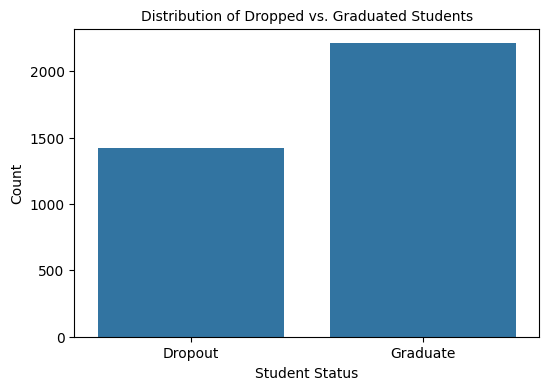

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Target'])
plt.title("Distribution of Dropped vs. Graduated Students")
plt.xlabel("Student Status")
plt.ylabel("Count")
plt.show()

In [ ]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Marital status: 6 unique values
Application mode: 18 unique values
Application order: 7 unique values
Course: 17 unique values
Daytime/evening attendance	: 2 unique values
Previous qualification: 17 unique values
Previous qualification (grade): 101 unique values
Nacionality: 19 unique values
Mother's qualification: 29 unique values
Father's qualification: 34 unique values
Mother's occupation: 29 unique values
Father's occupation: 42 unique values
Admission grade: 602 unique values
Displaced: 2 unique values
Educational special needs: 2 unique values
Debtor: 2 unique values
Tuition fees up to date: 2 unique values
Gender: 2 unique values
Scholarship holder: 2 unique values
Age at enrollment: 46 unique values
International: 2 unique values
Curricular units 1st sem (credited): 21 unique values
Curricular units 1st sem (enrolled): 23 unique values
Curricular units 1st sem (evaluations): 35 unique values
Curricular units 1st sem (approved): 23 unique values
Curricular units 1st sem (grade):

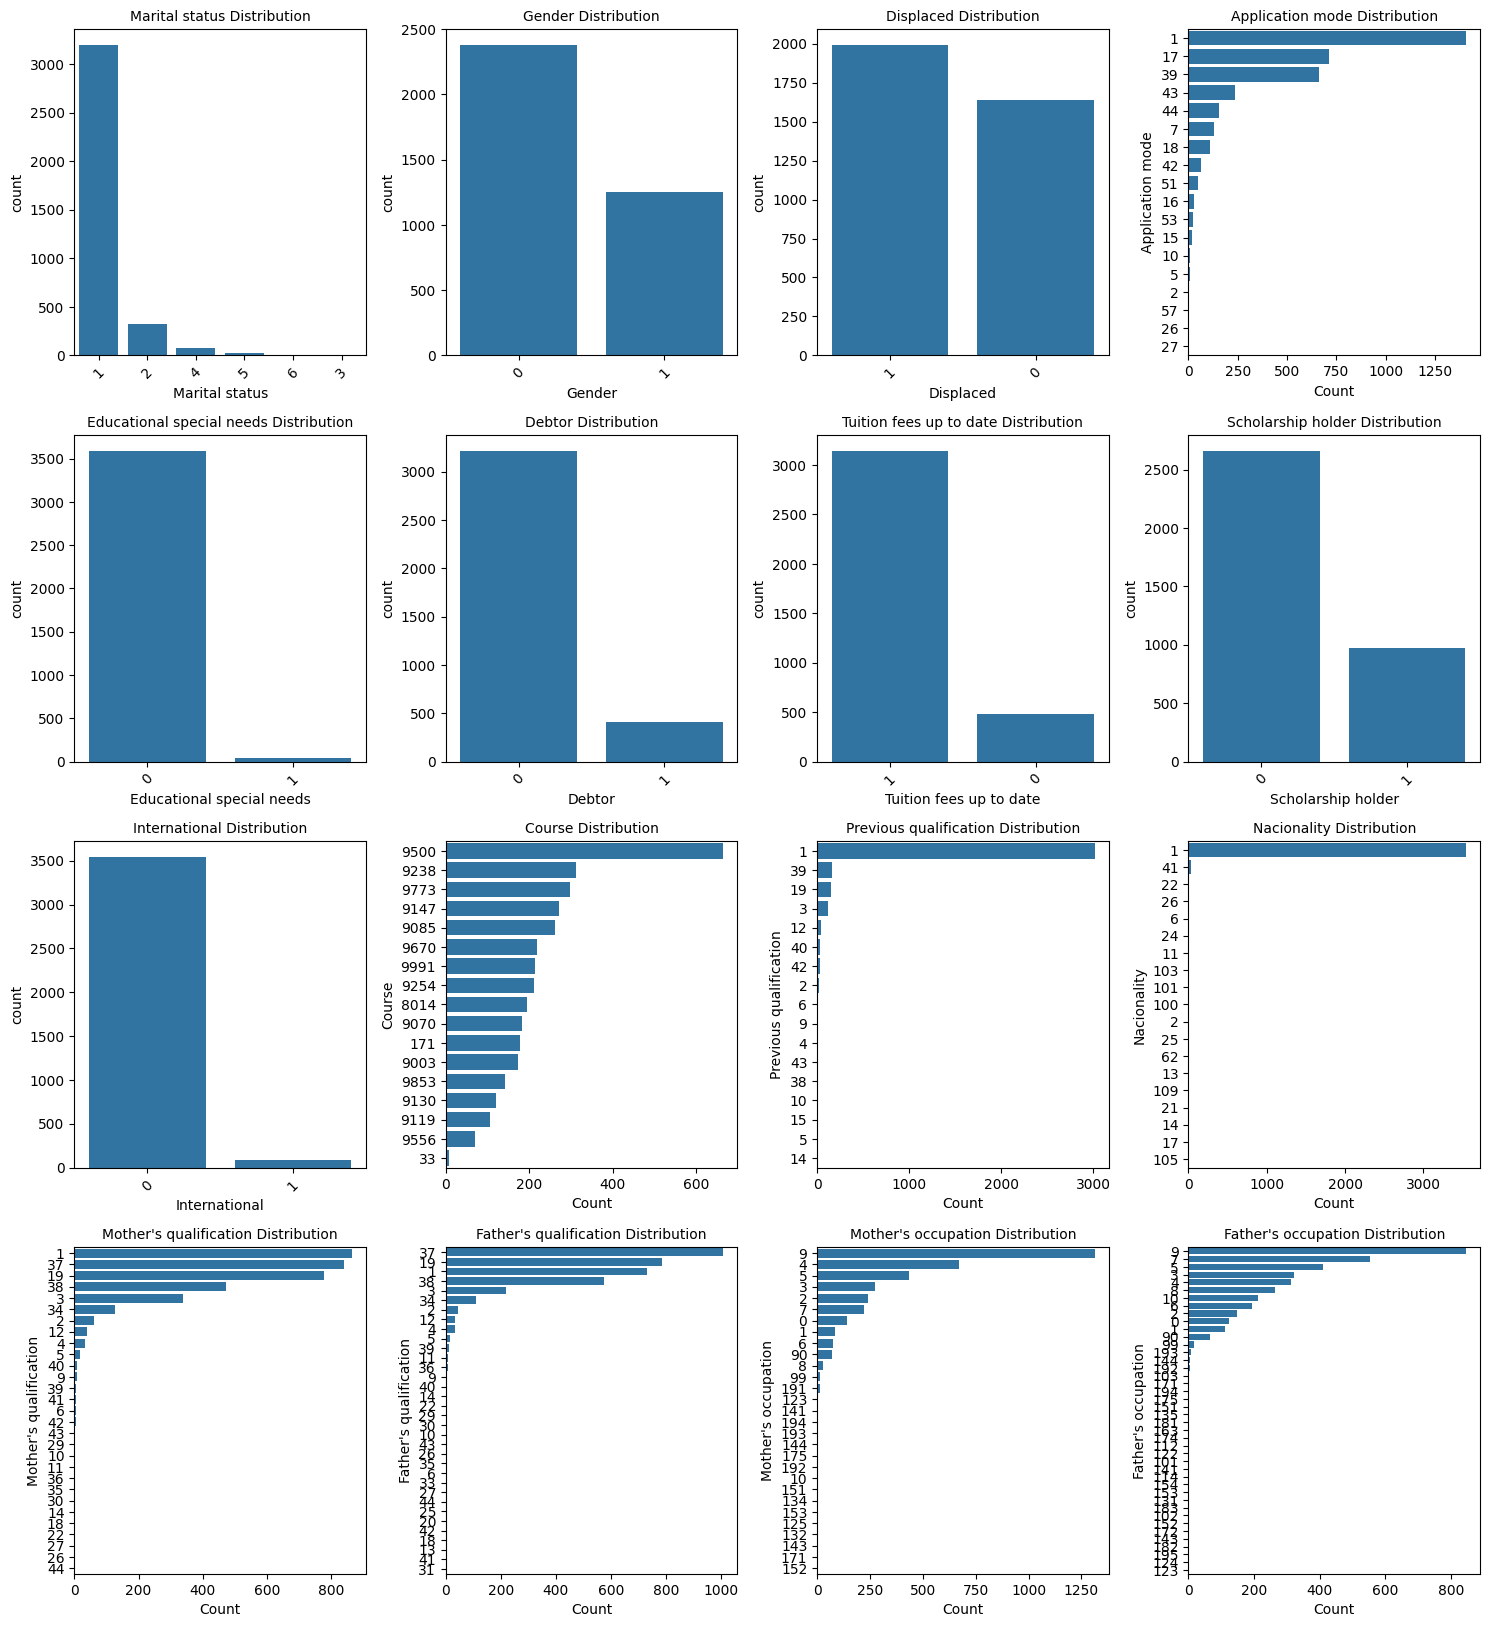

In [ ]:
categorical_variables = [
    'Marital status',  'Gender', 'Displaced', 'Application mode','Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Scholarship holder', 'International', 'Course',
    'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification',
    'Mother\'s occupation', 'Father\'s occupation'
]

plt.figure(figsize=(15, 20))  # Increased height to prevent overlap
for i, col in enumerate(categorical_variables, 1):
    plt.subplot(5, 4, i)

    # Choose horizontal bars for better readability if many categories exist
    if df[col].nunique() > 10:  # If too many unique values, use horizontal bars
        sns.countplot(data=df, y=col,order=df[col].value_counts().index)
        plt.xlabel("Count")
    else:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.xticks(rotation=45)  # Rotate labels for better readability

    plt.title(f'{col} Distribution')

plt.tight_layout()
plt.show()


In [ ]:
for col in categorical_variables:
    print(f"Category counts for {col}:")
    print(df[col].value_counts())
    print("-" * 40)

Category counts for Marital status:
Marital status
1    3199
2     327
4      75
5      22
6       5
3       2
Name: count, dtype: int64
----------------------------------------
Category counts for Gender:
Gender
0    2381
1    1249
Name: count, dtype: int64
----------------------------------------
Category counts for Displaced:
Displaced
1    1993
0    1637
Name: count, dtype: int64
----------------------------------------
Category counts for Application mode:
Application mode
1     1408
17     713
39     664
43     237
44     157
7      132
18     108
42      66
51      46
16      30
53      25
15      20
10      10
5        8
2        3
57       1
26       1
27       1
Name: count, dtype: int64
----------------------------------------
Category counts for Educational special needs:
Educational special needs
0    3590
1      40
Name: count, dtype: int64
----------------------------------------
Category counts for Debtor:
Debtor
0    3217
1     413
Name: count, dtype: int64
-----------

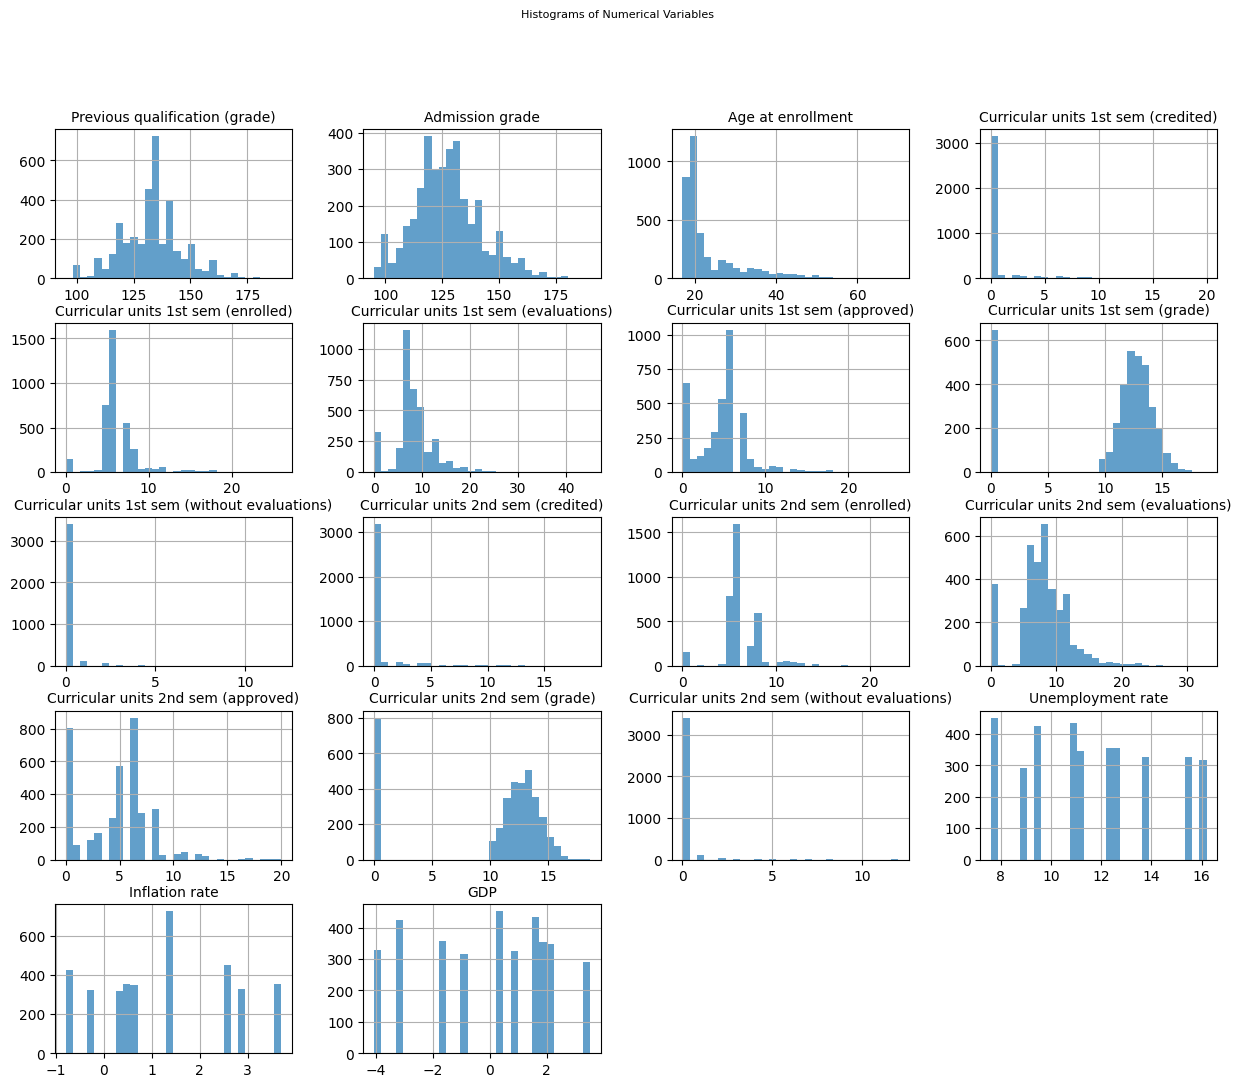

In [ ]:
numerical_variables = [
    'Previous qualification (grade)','Admission grade', 'Age at enrollment',
    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate', 'Inflation rate', 'GDP'
]
plt.rc('axes', titlesize=10)
df[numerical_variables].hist(figsize=(15, 12), bins=30, alpha=0.7)
plt.suptitle("Histograms of Numerical Variables", fontsize=8)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Convert categorical to numerical using Label Encoding
df_encoded = df.copy()
for col in categorical_variables:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

# To check feature importance
X = df_encoded.drop(columns=['Target'])
y = df_encoded['Target']
model = RandomForestClassifier()
model.fit(X, y)

# Display feature importance
importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importance)

Curricular units 2nd sem (approved)               0.201271
Curricular units 1st sem (approved)               0.142694
Curricular units 2nd sem (grade)                  0.138930
Curricular units 1st sem (grade)                  0.059213
Tuition fees up to date                           0.055887
Curricular units 2nd sem (evaluations)            0.033494
Age at enrollment                                 0.033083
Admission grade                                   0.028317
Course                                            0.025081
Previous qualification (grade)                    0.024318
Curricular units 2nd sem (enrolled)               0.021534
Curricular units 1st sem (evaluations)            0.021057
Scholarship holder                                0.017814
Debtor                                            0.016695
Father's occupation                               0.016623
Curricular units 1st sem (enrolled)               0.016618
Application mode                                  0.0158

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


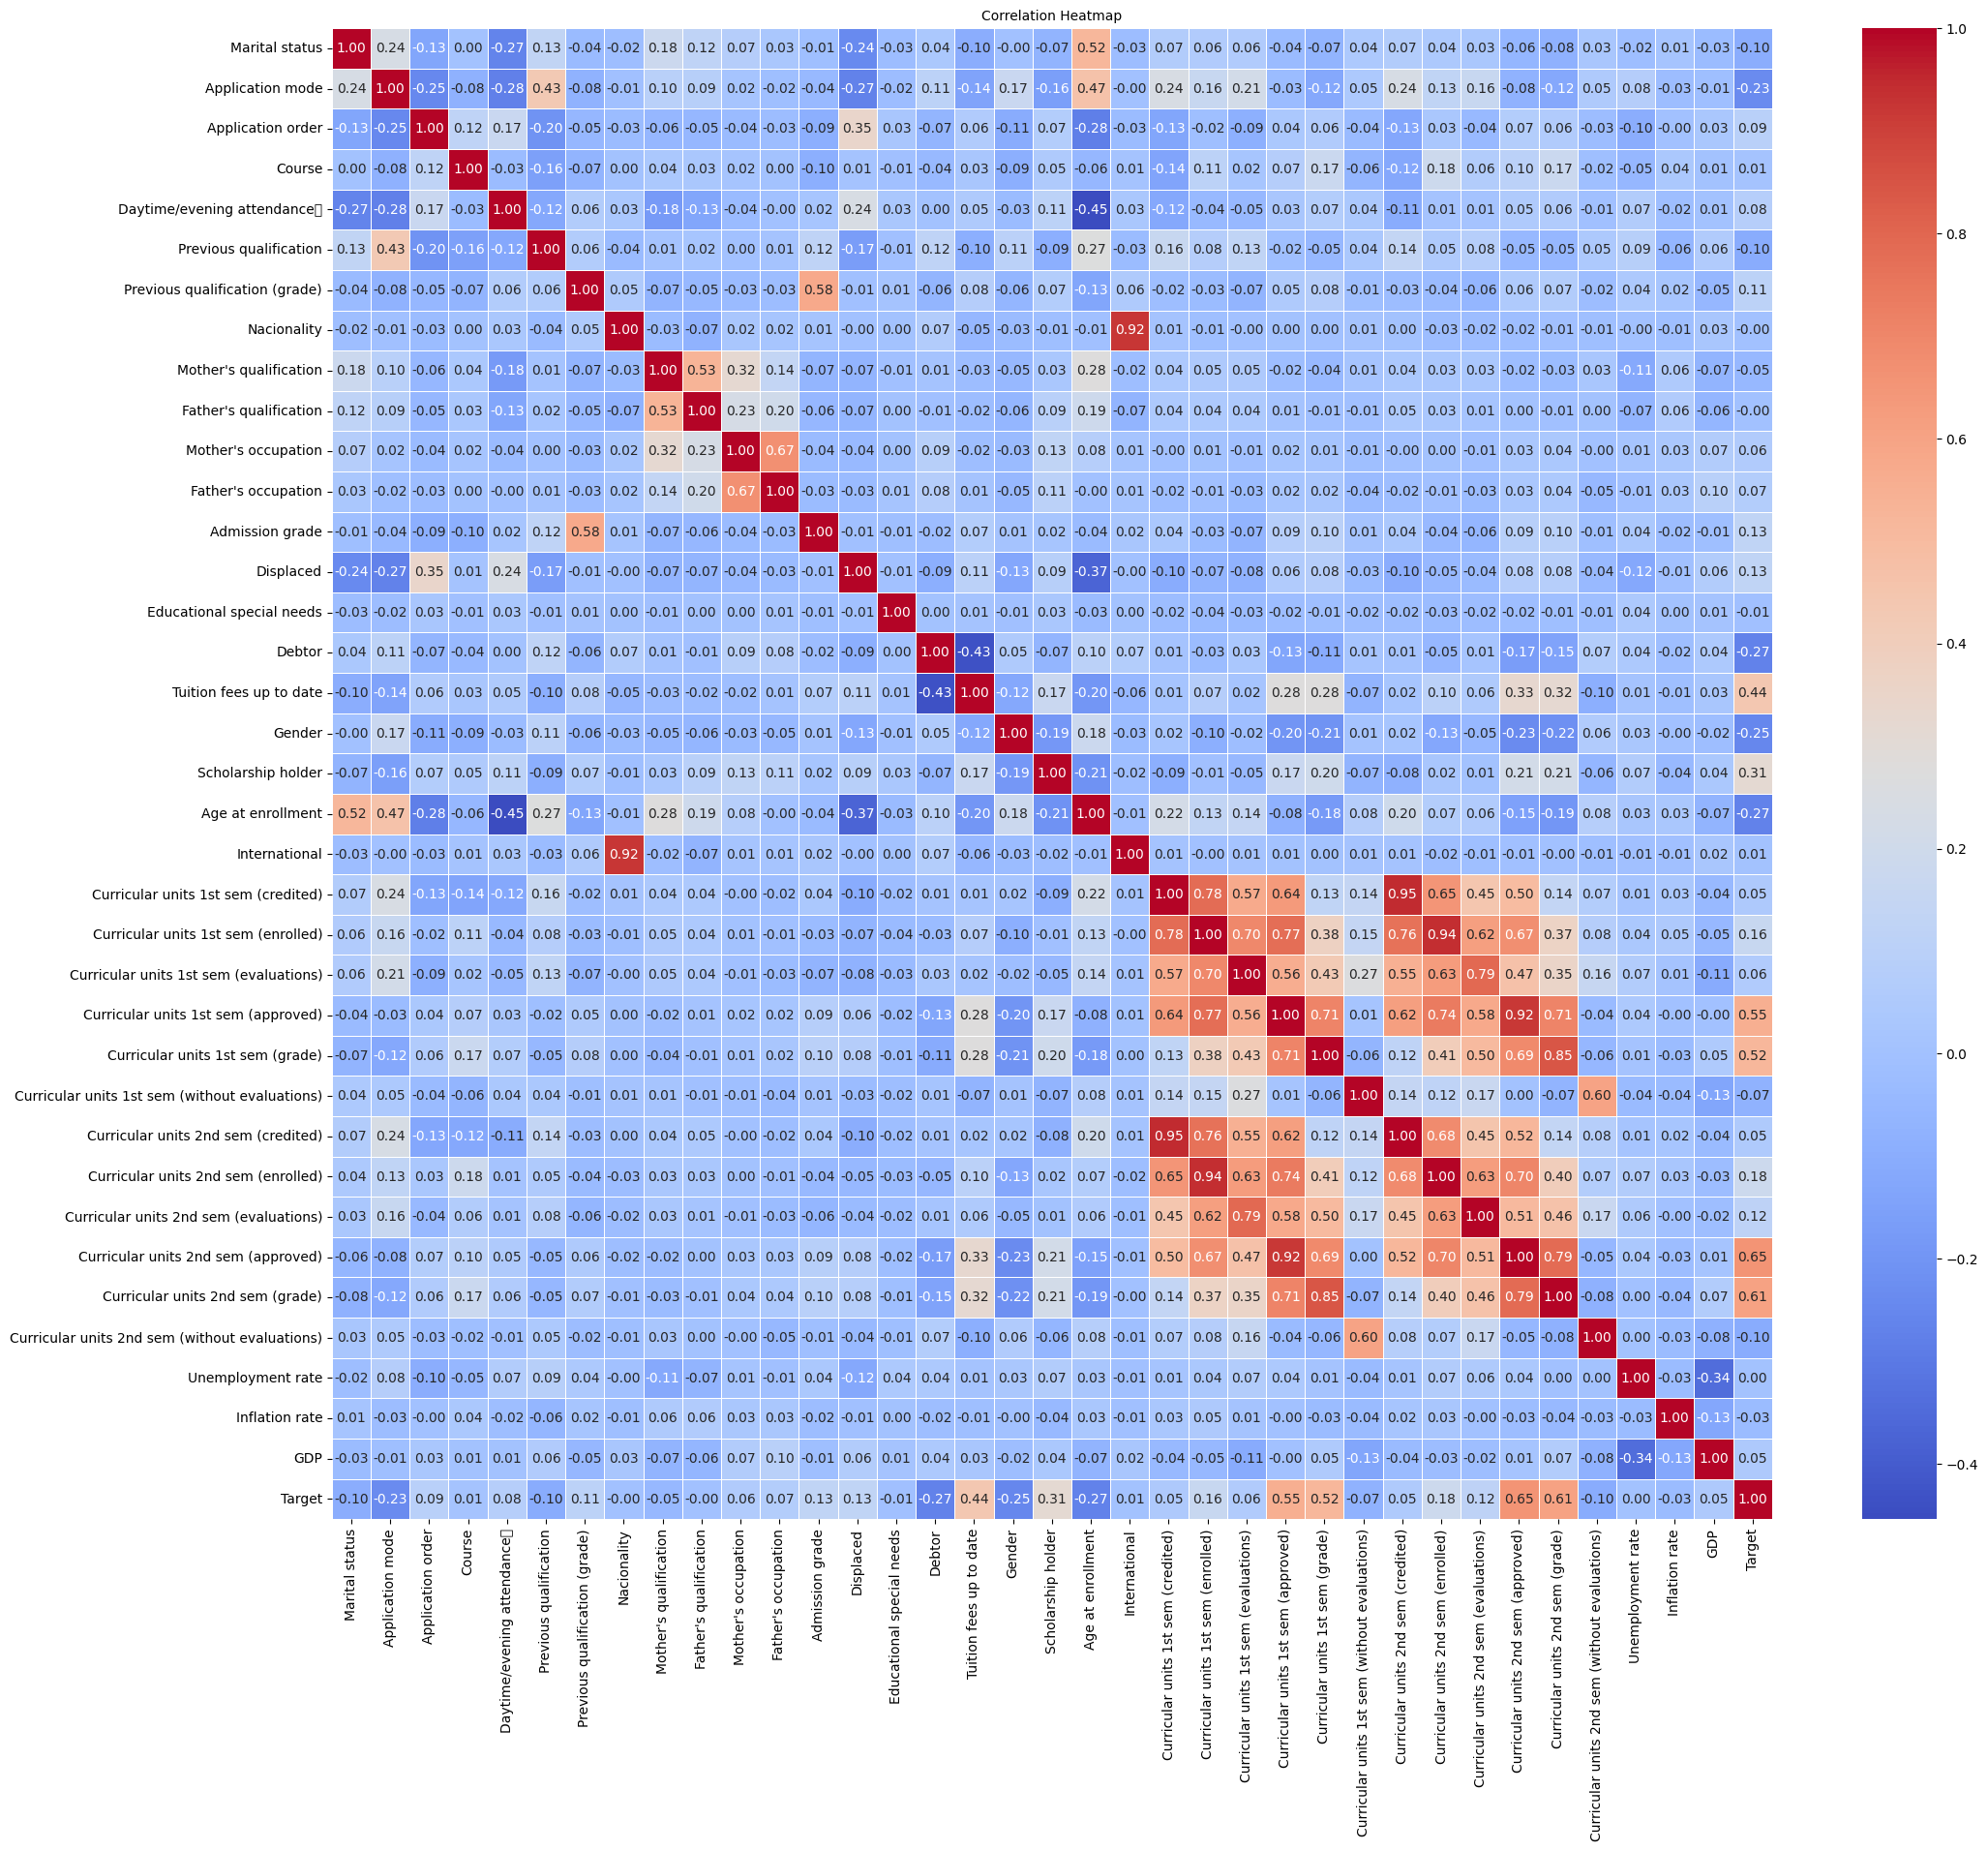


 Correlation of features with target:
                                           Feature  Correlation
0              Curricular units 2nd sem (approved)     0.653995
1                 Curricular units 2nd sem (grade)     0.605350
2              Curricular units 1st sem (approved)     0.554881
3                 Curricular units 1st sem (grade)     0.519927
4                          Tuition fees up to date     0.442138
5                               Scholarship holder     0.313018
6                                Age at enrollment     0.267229
7                                           Debtor     0.267207
8                                           Gender     0.251955
9                                 Application mode     0.233888
10             Curricular units 2nd sem (enrolled)     0.182897
11             Curricular units 1st sem (enrolled)     0.161074
12                                 Admission grade     0.128058
13                                       Displaced     0.126113
1

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_enc = LabelEncoder()

for col in categorical_variables:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

df_encoded['Target'] = label_enc.fit_transform(df_encoded['Target'])
# Correlation Matrix
plt.figure(figsize=(24, 20))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Correlation with Target
correlation_matrix = df_encoded.corr()
target_corr = correlation_matrix["Target"].drop("Target")
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# convering to dataFrame to show the results
correlation_table = pd.DataFrame({"Feature": target_corr_sorted.index, "Correlation": target_corr_sorted.values})

print("\n Correlation of features with target:")
print(correlation_table)


#Data Preprocessing
To select relevant features for the model prediction, random classifier and correlation analysis were used. Features with low predictive importance or weak correlations with the target variable were removed to likely improve model efficiency and generalization. Accordingly 'International' and 'Educational special needs' has both low feature importance and low correlation with target so they are removed. Also Nationality and International are highly correlated hence removing one will avoid redudancy.

Other key preprocessing steps include-

a)	Target: The target variable is mapped to 0 (Dropout) and 1 (Graduate) for binary classification.

b)	Features:
The variables will be grouped based on how we will process them in our network,and we will have three that includes

*Embedding Features*, variables that represent categories but are stored as numbers (eg., 'Course', 'Nationality', 'Previous Qualification') have high cardinality (some features have about 42 unique categories) will be embedded using TensorFlow’s embedding layers instead of one hot encoding.Even though our categories are represented as numbers, they are still categorical in nature hence embedding will be beneficial than treating as continous numbers for modelling.
*Binary Variables*, will be kept as-is for modeling without additional transformation. Marital status will be one hot encoded as single, married, divorced and others(others will include widower,facto union etc) this will essentially be included in binary variables when inputing in the model. *Numeric variables*, that represent counts, like grades etc were normalized using TensorFlow’s Normalization layer.Also ordinal variables that has fewer categories were considered numeric.

c) Additionally, before applying embeddings, categorical variables are converted into numerical indices. Each unique category within a feature is assigned a unique integer value, creating a mapping between category names and indices. This ensures that these variables are processed effectively by the embedding layers. Embedding features are stored in a dictionary as it helps define the embedding layer size effectively. Furthermore, spaces and special characters in feature names that could potentially cause any issues when building the model are removed.

In [ ]:
#df.drop(columns=['Educational special needs', 'International'], inplace=True)

In [ ]:
df.describe(include='all').transpose()[['mean','std']]

,mean,std
Marital status,1.184298,0.613009
Application mode,18.421763,17.358595
Application order,1.750138,1.333831
Course,8853.980992,2068.760082
Daytime/evening attendance\t,0.887603,0.315897
Previous qualification,4.532231,10.024134
Previous qualification (grade),132.920606,13.238373
Nacionality,1.828099,6.667614
Mother's qualification,19.986226,15.585278
Father's qualification,22.571625,15.275453


In [ ]:
df['Marital status'] = df['Marital status'].apply(lambda x: x if x in [1, 2, 4] else 99)
print(df['Marital status'].value_counts())

Marital status
1     3199
2      327
4       75
99      29
Name: count, dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['Marital status'], dtype=int)

In [ ]:
print(df.columns)

Index(['Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
   

In [ ]:
df["Target"] = df["Target"].map({"Dropout": 0, "Graduate": 1})

print(df["Target"])

0       0
1       1
2       0
3       1
4       1
       ..
4419    1
4420    0
4421    0
4422    1
4423    1
Name: Target, Length: 3630, dtype: int64


In [ ]:
print(df["Target"].unique())

[0 1]


In [ ]:
# Renaming columns to remove characters
df.columns = [col.replace("'", "").replace(" ", "_") for col in df.columns]

embedding_features = {
    'Application_mode': 18,
    'Course': 17,
    'Previous_qualification': 17,
    'Nacionality': 19,
    'Mothers_qualification': 29,
    'Fathers_qualification': 34,
    'Mothers_occupation': 29,
    'Fathers_occupation': 42
}


# Numeric features that need normalization
numeric_features = ['Previous qualification (grade)', 'Admission grade', 'Application order', 'Age at enrollment',
                    'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
                    'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
                    'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
                    'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
                    'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
                    'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)',
                    'Unemployment rate', 'Inflation rate', 'GDP']

# Binary features ( 0/1 values, hence used as-is)
binary_features = ['Daytime/evening attendance\t', 'Displaced', 'Debtor',
                   'Tuition fees up to date', 'Gender', 'Scholarship holder',
                   'Marital status_1', 'Marital status_2', 'Marital status_4', 'Marital status_99']

In [ ]:
print("Embedding Features:", len(embedding_features))
print("Numeric Features:", len(numeric_features))
print("Binary Features:", len(binary_features))

Embedding Features: 8
Numeric Features: 19
Binary Features: 10


In [ ]:

# Renaming feature lists to match the new column names, to ensure that no issues are caused while building the model
embedding_features = {col.replace("'", "").replace(" ", "_"): vocab_size for col, vocab_size in embedding_features.items()}
binary_features = [col.replace("'", "").replace(" ", "_") for col in binary_features]
numeric_features = [col.replace("'", "").replace(" ", "_") for col in numeric_features]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Extract feature subsets
X_embed = df[list(embedding_features.keys())]
X_numeric = df[numeric_features]
X_binary = df[binary_features]
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['Target']), y, test_size=0.2, random_state=42, stratify=y
)

# Convert categorical variables to contiguous indices
for col in embedding_features.keys():
    unique_vals = X_train[col].unique()
    category_map = {val: idx for idx, val in enumerate(unique_vals)}

    # Apply mapping to both train and test sets
    X_train[col] = X_train[col].map(category_map).fillna(-1).astype(int)
    X_test[col] = X_test[col].map(category_map).fillna(-1).astype(int)


# Separate subsets after encoding
X_embed_train = X_train[list(embedding_features.keys())]
X_embed_test = X_test[list(embedding_features.keys())]

X_numeric_train = X_train[numeric_features]
X_numeric_test = X_test[numeric_features]

X_binary_train = X_train[binary_features]
X_binary_test = X_test[binary_features]

In [ ]:
print(len(df))
print(len(y_train) + len(y_test))

3630
3630


In [ ]:
print(len(X_embed_train), len(X_numeric_train), len(X_binary_train), len(y_train))
print(len(X_embed_test), len(X_numeric_test), len(X_binary_test), len(y_test))

2904 2904 2904 2904
726 726 726 726


In [ ]:
X_embed_train = [X_embed_train[col].values.reshape(-1, 1) for col in embedding_features]
X_embed_test = [X_embed_test[col].values.reshape(-1, 1) for col in embedding_features]



In [ ]:
print("Embedding Inputs Shape:", [x.shape for x in X_embed_train])
print("Numeric Inputs Shape:", X_numeric_train.shape)
print("Binary Inputs Shape:", X_binary_train.shape)
print("Target Shape:", y_train.shape)


Embedding Inputs Shape: [(2904, 1), (2904, 1), (2904, 1), (2904, 1), (2904, 1), (2904, 1), (2904, 1), (2904, 1)]
Numeric Inputs Shape: (2904, 19)
Binary Inputs Shape: (2904, 10)
Target Shape: (2904,)


#Model architecture

After preprocessing and train-test split(80/20) a Multi-Layer Perceptron (MLP) using TensorFlow Keras is modelled. As features are kept seperate we will have X_embed_train, X_numeric_train, and X_binary_train for the training. The architecture includes

1)	Input Layer that has three sets of input tensors a) Embedding inputs, one per categorical feature, where each category is mapped to a dense vector of size min(50, (vocab_size // 2) + 1), vocab_size refers to the number of unique categories in each feature. This will likely avoid unnecessarily large embeddings for features with a small number of unique categories(for instance we have categories ranging from 15-42).  Thus, this can potentially be an effective way to allocate embedding sizes dynamically based on the number of unique values in our categorical features.
b) Numeric input, a vector containing all numeric features and c) Binary input, a vector containing all binary features. Embeddings are then flattened and concatenated with normalized numeric data and binary inputs.

2)	Hidden Layers will have two dense layers with 32 neurons and 15 neurons, with Relu activation and a small L2 (le-5) is used.

3)	 Output Layer, a neuron with sigmoid activation for binary output classification.

The Functional model is chosen instead of the Sequential due to multiple inputs and complex feature processing.
The model is compiled with Adam optimizer, binary cross-entropy loss and accuracy as the metric.


In [ ]:
from tensorflow.keras import layers, Model, Input


class MLP(Model):
    """Multilayer Perceptron with Embeddings"""

    def __init__(self, X_numeric_train, embedding_features, numeric_features, binary_features, activ='relu'):
        super().__init__()

        # Storing feature names
        self.embedding_features = embedding_features
        self.numeric_features = numeric_features
        self.binary_features = binary_features

        # Normalize numeric inputs
        self.normalizer = layers.Normalization(axis=-1)
        self.normalizer.adapt(X_numeric_train.to_numpy().astype(np.float32))

        # Define embedding layers
        self.embedding_layers = {
            col: layers.Embedding(
                input_dim=vocab_size + 1,
                output_dim= min(50, (vocab_size // 2) + 1),
                name=f"{col}_embed"
            )
            for col, vocab_size in embedding_features.items()
        }

        # Define MLP layers
        self.dense1 = layers.Dense(32, activation=activ, kernel_regularizer=tf.keras.regularizers.l2(1e-5))
        self.dense2 = layers.Dense(15, activation=activ, kernel_regularizer=tf.keras.regularizers.l2(1e-5))
        self.output_layer = layers.Dense(1, activation='sigmoid')  # Binary classification

        # Building Functional Model
        self.model = self.build_model()

    def build_model(self):
        """Builds the model using the Functional API"""
        embedding_inputs = [Input(shape=(1,), dtype=tf.int32, name=f"{col}_input") for col in self.embedding_features]
        numeric_input = Input(shape=(len(self.numeric_features),), dtype=tf.float32, name="numeric_input")
        binary_input = Input(shape=(len(self.binary_features),), dtype=tf.float32, name="binary_input")

        # Process embeddings
        embed_outputs = [layers.Flatten()(self.embedding_layers[col](embedding_inputs[i]))
                         for i, col in enumerate(self.embedding_features.keys())]

        # Normalize numeric inputs
        norm_numeric = self.normalizer(numeric_input)

        # Concatenate all features
        merged = layers.Concatenate()([*embed_outputs, norm_numeric, binary_input])

        # Passing through dense layers
        x = self.dense1(merged)
        x = self.dense2(x)
        output = self.output_layer(x)

        # Create functional model
        model = Model(inputs=[*embedding_inputs, numeric_input, binary_input], outputs=output)
        model.summary()  # Print model summary for analysing
        return model

    def call(self, inputs):
        return self.model(inputs)



In [ ]:
print(type(embedding_features))

<class 'dict'>


In [ ]:

# Model
model = MLP(X_numeric_train, embedding_features, numeric_features, binary_features)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Application_mode_input    │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Course_input (InputLayer) │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Previous_qualification_i… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Nacionality_input         │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Mothers_qualification_in… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Fathers_qualification_in… │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Mothers_occupation_input  │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Fathers_occupation_input  │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Application_mode_embed    │ (None, 1, 10)          │            190 │ Application_mode_inpu… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Course_embed (Embedding)  │ (None, 1, 9)           │            162 │ Course_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Previous_qualification_e… │ (None, 1, 9)           │            162 │ Previous_qualificatio… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Nacionality_embed         │ (None, 1, 10)          │            200 │ Nacionality_input[0][… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Mothers_qualification_em… │ (None, 1, 15)          │            450 │ Mothers_qualification… │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Fathers_qualification_em… │ (None, 1, 18)          │            630 │ Fathers_qualification… │
│ (Embedding)          

 Total params: 8,156 (31.86 KB)

 Trainable params: 8,117 (31.71 KB)

 Non-trainable params: 39 (160.00 B)

In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "mlp_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization)      │ (None, 19)                  │              39 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Application_mode_embed (Embedding)   │ (None, 1, 10)               │             190 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Course_embed (Embedding)             │ (None, 1, 9)                │             162 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Previous_qualification_embed         │ (None, 1, 9)                │             162 │
│ (Embedding)                          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Nacionality_embed (Embedding)        │ (None, 1, 10)               │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mothers_qualification_embed          │ (None, 1, 15)               │             450 │
│ (Embedding)                          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fathers_qualification_embed          │ (None, 1, 18)               │             630 │
│ (Embedding)                          │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Mothers_occupation_embed (Embedding) │ (None, 1, 15)               │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Fathers_occupation_embed (Embedding) │ (None, 1, 22)               │             946 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           4,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 15)                  │             495 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              16 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ functional_4 (Functional)            │ (None, 1)                   │           8,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,156 (31.86 KB)

 Trainable params: 8,117 (31.71 KB)

 Non-trainable params: 39 (160.00 B)

In [ ]:
# Ensuring numeric and binary inputs are float32
X_numeric_train = X_numeric_train.astype(np.float32)
X_numeric_test = X_numeric_test.astype(np.float32)

X_binary_train = X_binary_train.astype(np.float32)
X_binary_test = X_binary_test.astype(np.float32)

# Extract embedding features correctly from X_train and X_test
X_embed_train = [X_train[col].astype(np.int64).to_numpy().reshape(-1, 1) for col in embedding_features]
X_embed_test = [X_test[col].astype(np.int64).to_numpy().reshape(-1, 1) for col in embedding_features]

# Ensuring labels are float32
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


In [ ]:
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)
print("Target Shape:", y_train.shape)


Target Shape: (2904, 1)


#Experiments
Earlystopping Callback is used to monitors val_loss and stops training if no improvement, a patience parameter of 20 is set  ReduceLROnPlateau Callback is set to lower the learning rate by 50% if validation loss doesn’t improve for 8 epochs so the model converge better by making smaller updates.

The training data is prepared by combining embedding inputs, numeric features and binary features into a list so that the model processes all input types correctly, also the inputs are formatted properly before training. The Training process uses 400 epochs, but might stop early due to EarlyStopping. Smaller batch size of 32 is chosen for efficient training considering the size of the training instances we have. This has effectively monitored validation performance and adjusted learning rate dynamically. The callbacks is expected to prevents overfitting and improve stability.

#Evaluation
The model generalizes well, with a small gap between training and validation accuracy. others observations include

1)Training: Accuracy improves steadily from 76.65% (epoch 0) to 93.29% (last epoch). Loss decreases from 0.57 to 0.19, indicating good learning.

2)Validation: Validation accuracy starts at 78.37% and peaks at 91.18%. Validation loss follows a similar decreasing trend, stabilizing at around 0.245.

3)The training and validation accuracy difference is low (2.1% approx) hence has generalised well with a some overfitting.

#Performance evaluation metrics

The evaluation metrics suggest that the model has achieved strong predictive power. The model achieved an accuracy of 91.04%, the higher recall for graduated students (96%) suggests that the model is better in identifying students who complete their studies. But recall for the dropout class is 84%, hence a slightly higher recall will be beneficial specifically if we wanted to predict the at-risk students. ROC-AUC score of 0.8975 indicates strong model performance in classification.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=8,
    min_lr=1e-6,
    verbose=1
)

# Ensuring training data format is correct
train_inputs = X_embed_train + [X_numeric_train, X_binary_train]
val_inputs = X_embed_test + [X_numeric_test, X_binary_test]

# Train model with callbacks
history = model.fit(
    x=train_inputs,
    y=y_train,
    validation_data=(val_inputs, y_test),
    epochs=400,
    batch_size=32,
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)


Epoch 1/400
91/91 - 5s - 53ms/step - accuracy: 0.7665 - loss: 0.5706 - val_accuracy: 0.7837 - val_loss: 0.5418 - learning_rate: 1.0000e-04
Epoch 2/400
91/91 - 0s - 5ms/step - accuracy: 0.8123 - loss: 0.5231 - val_accuracy: 0.8251 - val_loss: 0.4965 - learning_rate: 1.0000e-04
Epoch 3/400
91/91 - 1s - 7ms/step - accuracy: 0.8385 - loss: 0.4817 - val_accuracy: 0.8430 - val_loss: 0.4588 - learning_rate: 1.0000e-04
Epoch 4/400
91/91 - 1s - 8ms/step - accuracy: 0.8502 - loss: 0.4463 - val_accuracy: 0.8540 - val_loss: 0.4270 - learning_rate: 1.0000e-04
Epoch 5/400
91/91 - 1s - 7ms/step - accuracy: 0.8578 - loss: 0.4160 - val_accuracy: 0.8623 - val_loss: 0.3996 - learning_rate: 1.0000e-04
Epoch 6/400
91/91 - 1s - 6ms/step - accuracy: 0.8657 - loss: 0.3902 - val_accuracy: 0.8691 - val_loss: 0.3766 - learning_rate: 1.0000e-04
Epoch 7/400
91/91 - 0s - 5ms/step - accuracy: 0.8743 - loss: 0.3686 - val_accuracy: 0.8747 - val_loss: 0.3568 - learning_rate: 1.0000e-04
Epoch 8/400
91/91 - 1s - 7ms/step

In [ ]:
def plot_learning(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error[class]')
    plt.legend()
    plt.show()

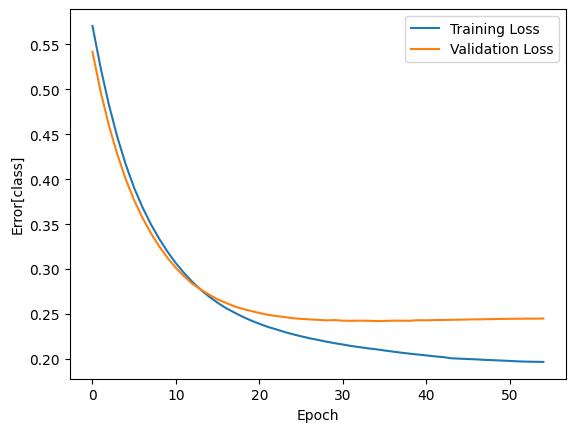

In [ ]:
plot_learning(history)

In [ ]:
# Convert history to dictionary
history_dict = history.history

# Extract values
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']
train_acc = history_dict.get('accuracy', history_dict.get('acc'))
val_acc = history_dict.get('val_accuracy', history_dict.get('val_acc'))

# Print final values
print(f"Final Training Loss: {train_loss[-1]:.4f}")
print(f"Final Validation Loss: {val_loss[-1]:.4f}")
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")



Final Training Loss: 0.1967
Final Validation Loss: 0.2450
Final Training Accuracy: 0.9329
Final Validation Accuracy: 0.9105


In [ ]:
test_loss, test_acc = model.evaluate(
    X_embed_test + [X_numeric_test, X_binary_test], y_test
)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9199 - loss: 0.2314 
Test Accuracy: 0.9105, Test Loss: 0.2422


In [ ]:
y_pred = model.predict(X_embed_test + [X_numeric_test, X_binary_test])
y_pred = (y_pred > 0.5).astype(int)  # Converting probabilities to binary 0/1


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9104683195592287
Confusion Matrix:
 [[238  46]
 [ 19 423]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.84      0.88       284
         1.0       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.91      0.90      0.90       726
weighted avg       0.91      0.91      0.91       726



In [ ]:
from sklearn.metrics import roc_auc_score

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


ROC-AUC Score: 0.8975


#Conclusion
This analysis focused on developing a deep learning model for predicting student sucess/dropout, with a combination of embedded categorical features, normalized numerical features, and binary attributes. One of the main challenges was handling high-cardinality categorical features, making preprocessing complex. Additionally, while the dataset exhibited a 60:40 class distribution, careful measures, such as stratified sampling, were taken to ensure no bias was introduced during training.
Hyperparameter tuning played a crucial role in model optimization, finding the right combination of learning rate and regularization were needed. With our dataset size for training instances, the risk of overfitting was mitigated through the application of L2 regularization and early stopping.The model was retested few times to achieve the optimal level. The model demonstrated good generalization, achieving a high validation accuracy. However, the ability to accurately predict dropouts still can be improved. Future improvements to the model could be likely made by adding more data, refining feature selection with deeper domain knowledge. This could likely add valuable insights, enhance performance and predict student dropout and success well.


## References
Realinho, V., Machado, J., Baptista, L., & Martins, M. V. (2022). Predicting Student Dropout and Academic Success. Data, 7(11), 146. https://doi.org/10.3390/data7110146

Martins, M. V., Tolledo, D., Machado, J., Baptista, L. M., & Realinho, V. (2021). Early prediction of student’s performance in higher education: a case study. In Trends and Applications in Information Systems and Technologies: Volume 1 9 (pp. 166-175). Springer International Publishing.

#Dataset
Realinho, V., Vieira Martins, M., Machado, J., & Baptista, L. (2021). Predict Students' Dropout and Academic Success [Dataset].
UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.